**linear regression**

In this notebook the linear regression is demonstrated in 6 examples:<br>
(note: internal links are only valid of the linked cell is already run)<br>
[example_1](#example_1): some datpoints with low noise<br>
[example_2](#example_2): more datapoints and stronger distortion<br>
[example_3](#example_3): Linear Regression with outliers<br>
[example_4](#example_4): regularized regression with ridge regression and lasso<br>
[example_5](#example_5): Regularized Regression with polynomial dataset<br>
[example_6](#example_6): Regularized Regression with overfitted polyfit<br>

***

<a id='calc_regression'></a>
### def calc_regression():
**function to define a linear model and fit the given data to the model**<br>
[sckit-learn.LinearModels](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)<br>

LinearRegression fits a linear model with coefficients $ \omega = \left\{\omega_1, ...,\omega_p\right\}$
to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. Mathematically it solves a problem of the form:
$$\min\limits_{\omega}||X\omega - y||_2^2 $$
more information about the class LinearRegression: [class LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

in ``calc_regression()`` the linear model will be created and fit to the given datapoints. It is possible to do the fitting with all datapoints or with a part of them (training).<br> The fitted model will be used to predict values along the x-Axis of the given datapoints. The accuricy of the linear model is represented due to [score()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score) and the two attributes ``coef_`` and ``intercept_``.
calc_regression() returns a dictionary containig the linear model and its datapoints as well as all information about the linear regression.


In [103]:
def calc_regression(data_points, training=False, test_size=None):
    #
    # create linear regression model
    reg_model = LinearRegression()
    #
    # split datapoints matrix in x and y values
    #
    # --> np.array.reshape(-1,1): -1: unknown size of row
    #                              1: 1 column
    #                    result:  a vertical vector of dataPoints with nRows(=len(dataPoints)) and 1 column 
    #
    X = data_points[:,0].reshape(-1,1)
    Y = data_points[:,1].reshape(-1,1)
    #
    # calc residual sum of squares
    # there are in general 2 ways of using the linear regression model
    # - calc residual sum of squares with all given datapoints
    # - devide the given datapoints into training and test data. 
    if training:
        # split data into training and test data
        #
        # here x% of the dataPoints are used to train the algortihm
        # --> parameter: 'test_size'
        #
        # parameter random_state set to a fix value in order to get always the same result with the same data
        #
        if test_size == None:
            test_size = 0.2
        #
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=5)
        #
        # create LinearRegression model and train it with training data
        #
        reg_model = LinearRegression()
        reg_model.fit(X_train, Y_train)
    else:
        reg_model.fit(X,Y)
        #
        #
    # test regModel when predicting along the x-axis:
    predicted_values = reg_model.predict(X)
    #
    dict_lin_regression = {
        'model': reg_model,
        'X': X,
        'Y': Y,
        'y_predict': predicted_values,
        'coef': reg_model.coef_,
        'intercept': reg_model.intercept_,
        'score': reg_model.score(X,Y)}
    
    return(dict_lin_regression)

<a id='get_Data_Points'></a>
### def get_Data_Points():
**function to define a 2 dimensional array with points on a linear function**<br>

input parameters:
- n_points
- slope
- intercept
- xmax
- xmin (default:0)

$\text{get_Data_Points()}$ returns a 2dimensional numpy-array with points of the linear function: y = slope * x + intercept.
- column_0: linear spaced x-values from xmin...xmax  
- column_1: y-values according to the linear function with the parameter slope and intercept
(column size depends on nPoints)


In [104]:
def get_Data_Points(n_points, slope, intercept, xmax, xmin=0):
    #
    data_points = empty([n_points, 2])
    data_points[:,0] = linspace(xmin, xmax, n_points)
    data_points[:,1] = data_points[:,0]*slope + intercept
    #
    return(data_points)

<a id='create_noiseVec'></a>
### def create_noise_vec():
**function to define a vector containig noise**<br>

input parameter:
- distortion
- n_length
- noise_type (default: 'gaussian')
- n_columns  (default: 2)

random generator:
numpy.random


In [105]:
def create_noise_vec(distortion, n_length, noise_type='gaussian', n_columns=2):
    #
    # create a vector of given size with noise
    #
    if noise_type == 'gaussian':
        mu = 0 # parameter mu has no effect on the distortion
        noise_vec = random.normal(mu, distortion, [n_length, n_columns]) 
    #
    return(noise_vec)

<a id='example_1'></a><br>**Example 1**

simple dataset with a few points and not much noise.

Create dataset using function [get_Data_Points()](#get_DataPoints) und [create_noise_vec()](#create_noiseVec). The predefined parameters allow following linear function:<br>
- $y = 0.45 \bullet x + 0.5$
- total number of points:    20
- x-range: 0...10
<br>
- distortion: 0.4

After regression is computed with [calc_regression](#calc_regression) the predicted values are plotted together with the noisy datapoints and the 'true' linear function.

more info about linear regression: [sckit-learn.LinearModels](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)<br>

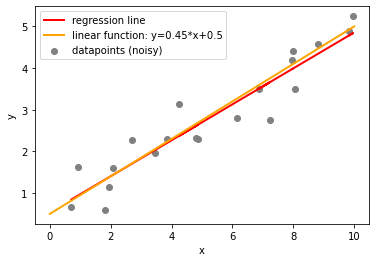

In [106]:
from numpy import random, empty, linspace
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
#
# generate a simple dataset
#
#
random.seed(0)
#
# create 20 datapoints
#
x_min = 0
x_max = 10
#
n_points = 20 
#
slope = 0.45 
#
intercept = 0.5
#
clear_linear_data = get_Data_Points(n_points, slope, intercept, x_max, x_min)
#
# create some noise
#
noise_data = create_noise_vec(0.4, n_points)
#
# add noise to the linear points
data = clear_linear_data + noise_data
#
# calculate linear regression
#
dict_reg = calc_regression(data)
#
#---------------------------------------------------------------------
#
# plot data
#
# 
x_points = dict_reg["X"]
y_points = dict_reg["Y"]
#
y_predict = dict_reg["y_predict"]
#
# all points (with little noise)
plt.scatter(x_points, y_points, color='gray', label="datapoints (noisy)")
# regression line from regression model
plt.plot(x_points, y_predict, color='red', linewidth=2, label="regression line")
# linear function of clean data (y = m*x + b)
plt.plot(clear_linear_data[:,0], clear_linear_data[:,1], color='orange', lw=2, label="linear function: y={}*x+{}".format(slope, intercept))
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

<a id='example_2'></a><br>**Example 2**

more datapoints and stronger distotion:

Create dataset using function [get_Data_Points()](#get_DataPoints) und [create_noise_Vec()](#create_noiseVec). The predefined parameters allow following linear function:<br>
- y = 0.45 * x + 0.5 <br>
- total number of points: 200 <br>
- x-range: 0...10 <br>
- distortion: 4.0

After regression is computed with [calc_regression](#calc_regression) the predicted values are plotted together with the noisy datapoints and the 'true' linear function.<br>
more info about linear regression: [sckit-learn.LinearModels](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)<br>

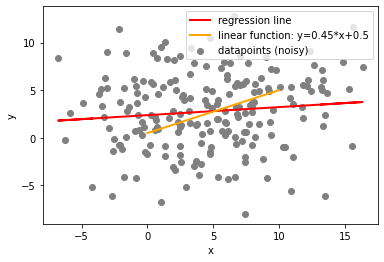

In [107]:
#
# generate a simple dataset with strong distortion
#
#
x_min = 0
x_max = 10
#
n_points = 200 # total number of points 
#
slope = 0.45 #(m)
#
intercept = 0.5 #(b)
#
clear_lineardata = get_Data_Points(n_points, slope, intercept, x_max, x_min)
#
# create some noise
#
noise_vec = create_noise_vec(4.0, n_points)
#
# add noise to the linear points
noisy_data = clear_lineardata + noise_vec
#
# calc linear regression
#
dict_reg = calc_regression(noisy_data)
#
#
# plot data
# 
x_points = dict_reg["X"]
y_points = dict_reg["Y"]
#
y_predicted = dict_reg["y_predict"]
#
# all points (with little noise)
plt.scatter(x_points, y_points, color='gray', label="datapoints (noisy)")
# regression line from regression model
plt.plot(x_points, y_predicted, color='red', linewidth=2, label="regression line")
# linear function of clean data (y = m*x + b)
plt.plot(clear_lineardata[:,0], clear_lineardata[:,1], color='orange', lw=2, label="linear function: y={}*x+{}".format(slope, intercept))
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

<a id='example_3'></a><br>**Example 3**

#### Linear Regression with outliers

Create dataset using function [get_Data_Points()](#get_DataPoints) und [create_noise_Vec()](#create_noiseVec). The predefined parameters allow following linear function:<br>
- y = $0.45\cdot x + 0.5 $
- nPoints:  100 (total number of points)
- xMin, xMax: 0...5 (x-range)
- nOutliers: 5 (number of outlier points) 
<br>
- distortion: 0.6

After regression is computed with [calc_regression](#calc_regression) the predicted values are plotted together with the noisy datapoints and the 'true' linear function.<br>
more info about linear regression: [sckit-learn.LinearModels](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)<br>

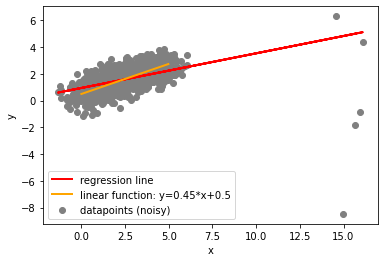

In [108]:
#
# generate a simple dataset with some noise and outlier points
#
x_min = 0
x_max = 5
#
n_points = 1000  
#
slope = 0.45
#
intercept = 0.5
#
n_outliers = 5
#
distortion = 0.6
#
# --------------------------------------------------------------------------------
# define clear dataset
clear_lineardata = get_Data_Points((n_points + n_outliers), slope, intercept, x_max, x_min)
#
# add Outliers
clear_lineardata[n_points:,0] = 15 + 0.5 * random.normal(size=(n_outliers))
clear_lineardata[n_points:,1] = -3 - 10 * random.normal(size=n_outliers)
#
# create some noise
noise_vec = create_noise_vec(distortion, (n_points + n_outliers))
# add noise to the linear points
noisydata = clear_lineardata + noise_vec
#
# calc linear regression
#
dict_reg = calc_regression(noisydata)
#
######################################
# plot data
#
# 
x_points = dict_reg["X"]
y_points = dict_reg["Y"]
#
y_predict = dict_reg["y_predict"]
#
# all points (with little noise)
plt.scatter(x_points, y_points, color='gray', label="datapoints (noisy)")
# regression line from regression model
plt.plot(x_points, y_predict, color='red', linewidth=2, label="regression line")
# linear function of clean data (y = m*x + b)
plt.plot(clear_lineardata[0:n_points,0], clear_lineardata[0:n_points,1], color='orange', lw=2, label="linear function: y={}*x+{}".format(slope, intercept))
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

<a id='regularized_regression'>**Regularized Regression**</a>

In the following examples 2 methods are shown:
- ridge regression
- Lasso

###### Ridge regression
Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients. The ridge coefficients minimize a penalized residual sum of squares:
$$ \min\limits_{\omega} || X\omega-y||_2^2 + \alpha ||\omega||_2^2$$
more info about ridge regression: [scikit-learn.ridge-regession:](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification)<br>

###### Lasso
The Lasso is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer non-zero coefficients, effectively reducing the number of features upon which the given solution is dependent. For this reason Lasso and its variants are fundamental to the field of compressed sensing.
Mathematically, it consists of a linear model with an added regularization term. The objective function to minimize is:
$$ \min\limits_{\omega} \frac{1}{2n_{samples}} || X\omega-y||_2^2 + \alpha ||\omega||_1$$
 
more info about Lasso: [scikit-learn.ridge-regession:](https://scikit-learn.org/stable/modules/linear_model.html#lasso)<br>

<a id="example_4"></a><br>
**example 4**
regularized regression with ridge regression and lasso

In this example the slope and intercept value from the ridge and lasso regression will be displayd in a histogram plot. To demonstrate the 2 methods, 3 datasets with different slopes will be created and fitted to the both models. This process will be repeated for 1000 times.

functions:
- f1: $y=0.0\cdot x+ 1.0$
- f2: $y=0.2\cdot x+ 1.0$
- f3: $y=2.0\cdot x+ 1.0$

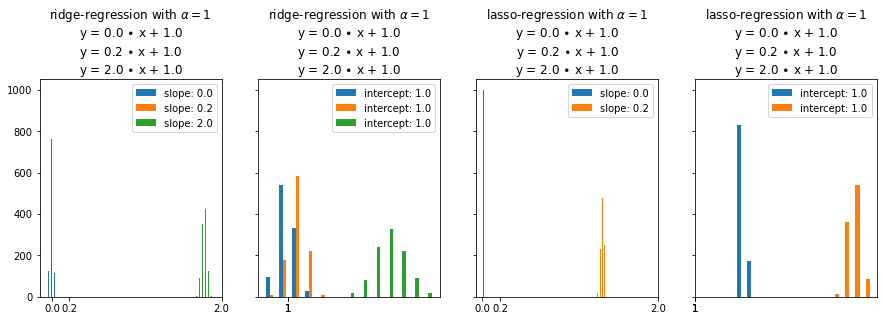

In [109]:
from numpy import random, empty, linspace
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
#
alpha = 1
#
x_min = 0
#
x_max = 5
#
n_points = 500
#
distortion= 0.5
#
n_repeats = 1000
#
slopes=[0.0, 0.2, 2.0]
#
intercept = [1.0, 1.0, 1.0]
#
coef_result = empty([n_repeats,6])
intercpt_result = empty([n_repeats,6])
#
ridgemodel = Ridge(alpha=alpha)
lassomodel = Lasso(alpha=alpha, max_iter=1e5)
#
for i in range(n_repeats):
    #
    noise = create_noise_vec(distortion, n_points)
    #
    set1 = get_Data_Points(n_points, slopes[0], intercept[0], x_max, x_min) + noise
    set2 = get_Data_Points(n_points, slopes[1], intercept[1], x_max, x_min) + noise
    set3 = get_Data_Points(n_points, slopes[2], intercept[2], x_max, x_min) + noise
    #
    # fit and analyse set1
    ridgemodel.fit(set1[:,0].reshape(-1,1), set1[:,1].reshape(-1,1))
    coef_result[i,0] = ridgemodel.coef_
    intercpt_result[i,0] = ridgemodel.intercept_
    #
    lassomodel.fit(set1[:,0].reshape(-1,1), set1[:,1].reshape(-1,1))
    coef_result[i,3] = lassomodel.coef_
    intercpt_result[i,3] = lassomodel.intercept_
    #
    # fit and analyse set2
    ridgemodel.fit(set2[:,0].reshape(-1,1), set2[:,1].reshape(-1,1))
    coef_result[i,1] = ridgemodel.coef_
    intercpt_result[i,1] = ridgemodel.intercept_
    #
    lassomodel.fit(set2[:,0].reshape(-1,1), set2[:,1].reshape(-1,1))
    coef_result[i,4] = lassomodel.coef_
    intercpt_result[i,4] = lassomodel.intercept_
    #
    # fit and analyse set3
    ridgemodel.fit(set3[:,0].reshape(-1,1), set3[:,1].reshape(-1,1))
    coef_result[i,2] = ridgemodel.coef_
    intercpt_result[i,2] = ridgemodel.intercept_
    #
    lassomodel.fit(set3[:,0].reshape(-1,1), set3[:,1].reshape(-1,1))
    coef_result[i,5] = lassomodel.coef_
    intercpt_result[i,5] = lassomodel.intercept_
    #
#----------------------------------------------------------------
#
# plot results
#
# slopes:                        interceptions:
# |--0..2--| ... |--3...5--|     |--0..2--| ... |--3...5--|
# |ridge() | ... | lasso()|      |ridge() | ... | lasso()|
# | set1-3 | ... | set1-3 |      | set1-3 | ... | set1-3 |
#
#
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,4), sharey=True)
axes[0].hist(coef_result[:,0:3], 55)
axes[1].hist(intercpt_result[:,0:3], 13)
axes[2].hist(coef_result[:,4:6], 55)
axes[3].hist(intercpt_result[:,4:6], 13)
#
axes[0].set_xticks(slopes)
# axes[0].set_ylim([0,1000])
axes[1].set_xticks(intercept)
axes[2].set_xticks(slopes)
axes[3].set_xticks(intercept)

#
str0 = r"ridge-regression with $\alpha = {{{}}}$".format(alpha)
str0 += "\n"
str0 += r"y = {} $\bullet$ x + {}".format(slopes[0], intercept[0])
str0 += "\n"
str0 += r"y = {} $\bullet$ x + {}".format(slopes[1], intercept[1])
str0 += "\n"
str0 += r"y = {} $\bullet$ x + {}".format(slopes[2], intercept[2])
axes[0].set_title(str0)
axes[0].legend(['slope: %.1f'%slopes[0], 'slope: %.1f'%slopes[1], 'slope: %.1f'%slopes[2]])
axes[1].set_title(str0)
axes[1].legend(['intercept: %.1f' %intercept[0], 'intercept: %.1f' %intercept[1], 'intercept: %.1f' %intercept[2]])
#
str1 = str0.replace('ridge', 'lasso')
axes[2].set_title(str1)
axes[2].legend(['slope: %.1f'%slopes[0], 'slope: %.1f'%slopes[1], 'slope: %.1f'%slopes[2]])
axes[3].set_title(str1)
axes[3].legend(['intercept: %.1f' %intercept[0], 'intercept: %.1f' %intercept[1], 'intercept: %.1f' %intercept[2]])
#
plt.show()

<a id="example_5"></a>**Example 5**

Regularized Regression with polynomial dataset

A polynomial function will be represented with just a litte amount of data points. This training data will be used for different regression models. The result can be seen in the following diagrams:

polynomial function:
$y= -10 \cdot x^3 - 2.3 \cdot x^2 + 0.1\cdot x -2$

number of training points (n_points): 20<br>
x_min: -2<br>
x_max: 2<br>
alpha ridge: 2.0<br>
alpha lasso: 2.0<br>
degree polyfit: 3<br>

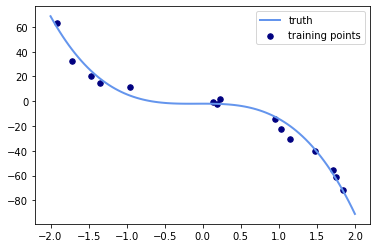

In [110]:
#
import matplotlib.pyplot as plt
from numpy import random, empty, linspace, sort, newaxis, poly1d, polyfit
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
#
# sample function: y = -10x³ - 2.3x² + 0.1x -2
#
def f(x):
    return(-10*x**3 - 2.3*x**2 +0.1*x -2)

#
# create dataset
# generate points and keep a subset of them
x_min=-2
x_max=2
#
n_points = 15
#
alpha_ridge = 2.0
alpha_lasso = 2.0
degree_polyfit = 3
#
#
x_0 = linspace(x_min,x_max,100)
x_plot = linspace(x_min,x_max,100)
#
# select from 200 points n_points randomly
rng = random.RandomState(0)
rng.shuffle(x_0)
x = sort(x_0[:n_points])
# get points from the polynomial function and add some gaussian noise
y = f(x) + random.normal(0, 4, n_points)
#
X = x[:, newaxis]
X_plot = x_plot[:, newaxis]
#--------------------------------------------------
#
# plot data
#
# define plot settings
colors = ['cornflowerblue','navy','teal', 'yellowgreen', 'gold', 'gray']
lw = 2
#
#
plt.plot(x_plot, f(x_plot), color=colors[0], linewidth=lw, label="truth")
#
plt.scatter(X, y, color=colors[1], s=30, marker='o', label="training points")
#
plt.legend()
plt.show()

show training data with linear Regression:

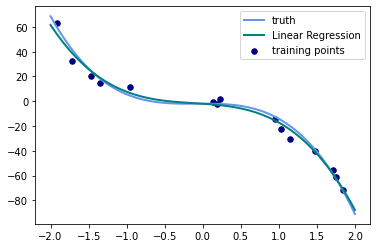

In [111]:
#
plt.plot(x_plot, f(x_plot), color=colors[0], linewidth=lw,
         label="truth")
#
plt.scatter(X, y, color=colors[1], s=30, marker='o', label="training points")
#
# linear regression
#
polynomial_features = PolynomialFeatures(degree=degree_polyfit)
#
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", LinearRegression())])
#
pipeline.fit(X,y)
LinPlot = pipeline.predict(X_plot)
#
plt.plot(x_plot, LinPlot, color=colors[2], linewidth=lw, label="Linear Regression")
plt.legend()
plt.show()

show training data with polyfit

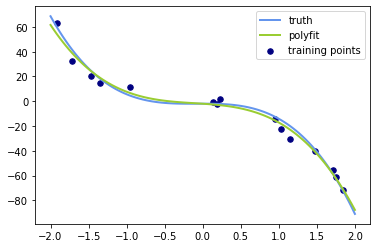

In [112]:
import warnings
from numpy import RankWarning
#
plt.plot(x_plot, f(x_plot), color=colors[0], linewidth=lw,
         label="truth")
#
plt.scatter(X, y, color=colors[1], s=30, marker='o', label="training points")
#
# poly fitting
p = poly1d(polyfit(X[:,0], y, degree_polyfit))

plt.plot(x_plot, p(x_plot), color=colors[3], lw=lw, label="polyfit")
#
plt.legend()
plt.show()

show training data with Ridge

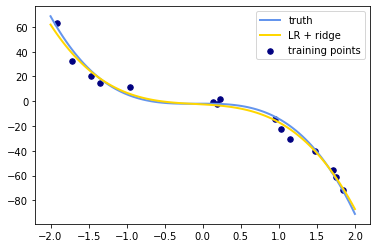

In [113]:
#
plt.plot(x_plot, f(x_plot), color=colors[0], linewidth=lw,
         label="truth")
#
plt.scatter(X, y, color=colors[1], s=30, marker='o', label="training points")
#
#LR + ridge
LR_ridge = Pipeline([("polynomial_features", PolynomialFeatures(degree=degree_polyfit, include_bias=False)),
                         ("linear_regression", Ridge(alpha=alpha_ridge))
                    ])
LR_ridge.fit(X,y)
yLR_ridge = LR_ridge.predict(X_plot)
#
plt.plot(X_plot, yLR_ridge, color=colors[4],lw=lw,label="LR + ridge")
plt.legend()
plt.show()

show training data with Lasso

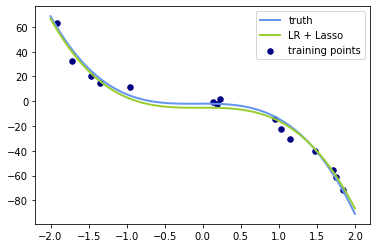

In [114]:
#
plt.plot(x_plot, f(x_plot), color=colors[0], linewidth=lw,
         label="truth")
#
plt.scatter(X, y, color=colors[1], s=30, marker='o', label="training points")
#

#LR + lasso
pf = PolynomialFeatures(degree=degree_polyfit, include_bias=False)
ls = Lasso(alpha=alpha_lasso)

LR_lasso = Pipeline([("polynomial_features", pf), ("linear_regression", ls)])
#
LR_lasso.fit(X,y)
yLR_lasso = LR_lasso.predict(X_plot)
#
plt.plot(X_plot, yLR_lasso, color=colors[3],lw=lw,label="LR + Lasso")
plt.legend()
plt.show()

plot all regression results 

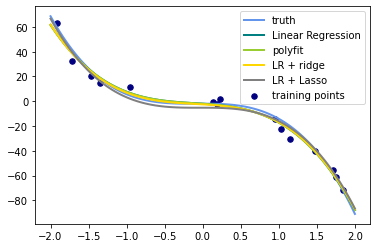

In [115]:
# plot all lines in one diagram
#
plt.plot(x_plot, f(x_plot), color=colors[0], linewidth=lw,
         label="truth")
#
plt.scatter(X, y, color=colors[1], s=30, marker='o', label="training points")
#
# linear regression
#
polynomial_features = PolynomialFeatures(degree=degree_polyfit)
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", LinearRegression())])
#
pipeline.fit(X,y)
LinPlot = pipeline.predict(X_plot)
plt.plot(x_plot, LinPlot, color=colors[2], linewidth=lw, label="Linear Regression")
#
# poly fitting
polyFit = poly1d(polyfit(x, y, degree_polyfit))
plt.plot(x_plot, polyFit(x_plot), color=colors[3], lw=lw, label="polyfit")
#
#LR + ridge
LR_ridge = Pipeline([("polynomial_features", PolynomialFeatures(degree=degree_polyfit)),
                         ("linear_regression", Ridge(alpha=alpha_ridge))
                    ])
LR_ridge.fit(X,y)
yLR_ridge = LR_ridge.predict(X_plot)
#
plt.plot(X_plot, yLR_ridge, color=colors[4],lw=lw,label="LR + ridge")
#
#LR + lasso
LR_lasso = Pipeline([("polynomial_features", PolynomialFeatures(degree=degree_polyfit)),
                         ("linear_regression", Lasso(alpha=alpha_lasso))])
LR_lasso.fit(X,y)
yLR_lasso = LR_lasso.predict(X_plot)
#
plt.plot(X_plot, yLR_lasso, color=colors[5],lw=lw,label="LR + Lasso")
plt.legend()
plt.show()
#

<a id="example_6"></a>**Example 6**

Illustration of overfitting
The polynomial function from above is here fitted with too high polynomial factors. The result can be seen in the following diagrams:

polynomial function:
$y= -10 \cdot x^3 - 2.3 \cdot x^2 + 0.1\cdot x -2$

number of training points (n_points): 20<br>
x_min: -2<br>
x_max: 2<br>
distortion: 0.5<br>
alpha ridge: 2.5<br>
alpha lasso: 2.5<br>
degree polyfit: 22<br>

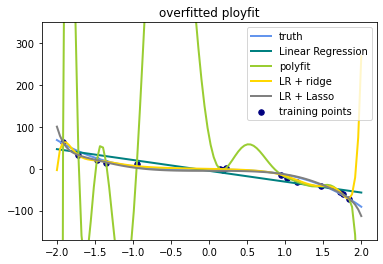

In [116]:
#--------------------------------------------------------------------------
#
# take dataset from above
#
# due to the high poly degree warnings occur which are simply ignored:
import warnings
#
warnings.filterwarnings('ignore')
#
alpha_ridge = 2.5
alpha_lasso = 2.5
degree_polyfit = 17
#
#------------------------------------------------------------------------------
# plot data
#
plt.plot(x_plot, f(x_plot), color=colors[0], linewidth=lw,
         label="truth")
#
plt.scatter(X, y, color=colors[1], s=30, marker='o', label="training points")
#
# linear regression
#
polynomial_features = PolynomialFeatures(degree=1)
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", LinearRegression())])
#
pipeline.fit(X,y)
LinPlot = pipeline.predict(X_plot)
#
# plot redicted data from linear regression:
plt.plot(x_plot, LinPlot, color=colors[2], linewidth=lw, label="Linear Regression")
#
# poly fitting
polyFit = poly1d(polyfit(x, y, degree_polyfit))
plt.plot(x_plot, polyFit(x_plot), color=colors[3], lw=lw, label="polyfit")
#
#LR + ridge
LR_ridge = Pipeline([("polynomial_features", PolynomialFeatures(degree=degree_polyfit)),
                         ("linear_regression", Ridge(alpha=alpha_ridge))
                    ])
LR_ridge.fit(X,y)
yLR_ridge = LR_ridge.predict(X_plot)
#
plt.plot(X_plot, yLR_ridge, color=colors[4],lw=lw,label="LR + ridge")
#
#LR + lasso
LR_lasso = Pipeline([("polynomial_features", PolynomialFeatures(degree=degree_polyfit)),
                         ("linear_regression", Lasso(alpha=alpha_lasso))])
LR_lasso.fit(X,y)
yLR_lasso = LR_lasso.predict(X_plot)
#
plt.plot(X_plot, yLR_lasso, color=colors[5], lw=lw, label="LR + Lasso")
plt.ylim([-170, 350])
plt.title("overfitted ployfit")
plt.legend()
plt.show()

Copyright © 2020 IUBH Internationale Hochschule